In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [7]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [8]:
from pytrends.request import TrendReq

In [9]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Apple", "Launch", "Inflation", "Imports", "Macbook", "Celebrity", "EXO", "Physiology", "Astronomy"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [10]:
df = df.resample("Q").mean()

In [11]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
print(X_scaled.shape)
print(y.shape)

(79, 9)
(79, 1)


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [17]:
lasso = Lasso(alpha = .01)

In [18]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.01)

In [19]:
coefficients = lasso.coef_

In [20]:
coefficients

array([ 0.18829189,  0.07169272,  0.17510363, -0.15315981, -0.04036741,
       -0.13898931,  0.        ,  0.        ,  0.        ])

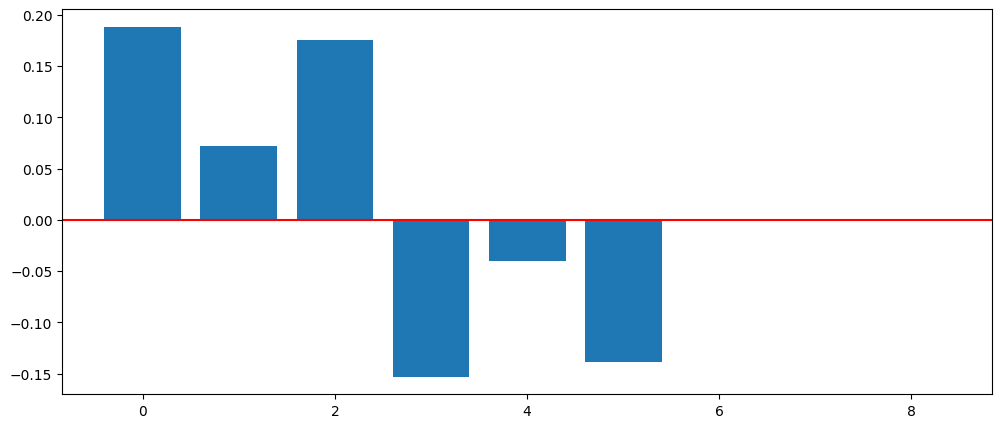

In [21]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients) # , X.columns
plt.axhline(0, color = "red")
plt.show()

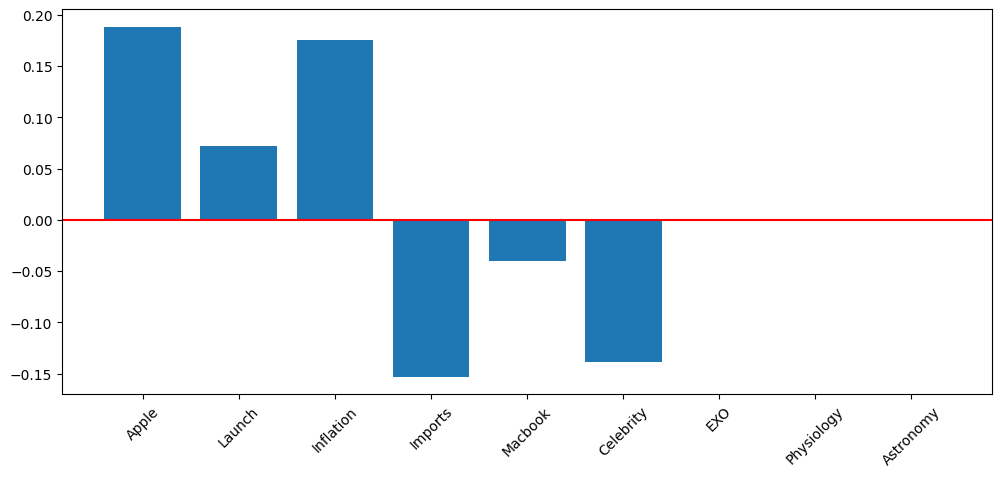

In [22]:
# Assuming 'X_aligned' is your DataFrame with the feature names
feature_names = X.columns

plt.figure(figsize=(12, 5))

# Using range(len(coefficients)) as x values
plt.bar(range(len(coefficients)), coefficients)

# Setting the x-axis labels with the feature names and rotating them for better readability
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.axhline(0, color="red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The bar chart illustrates the coefficients from a regression model where the independent variables include "Apple," "Launch," "Inflation," "Imports," "Macbook," "Celebrity," "EXO," "Physiology," and "Astronomy," with "BasicEPS" as the dependent variable.  

Upon examining the graph, it's apparent that "Apple," "Launch," "Inflation," "Imports," "Macbook," and "Celebrity" correlate with "BasicEPS," which is same as what I expected before. "Inflation" and "Imports" are economically relevant to EPS as they directly impact a company's financials. The terms "Apple" and "Macbook" are inherently associated with Apple Inc, suggesting a linkage to EPS through the company's branding and product offerings. "Launch" could symbolize the company's product release events, while "Celebrity" might capture the potential influence of celebrity effect on share price.  

On the other hand, "EXO," a Korean pop group, along with "Physiology" and "Astronomy," which are academic subjects, seemingly bear no significant correlation with the technological sector in Apple Inc. Their lack of association with Apple's stock price was anticipated, confirming the expectation that these terms would not have a substantial relationship with the company's EPS.  